In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# What is an intuitive explanation of Jensen's Inequality?

A good explanation of Jensen's Inequality should get you to say 'oh, duh.' If the idea is that obvious, you'll not only understand it, but it'll be easy to bend and extrapolate it to other related circumstances.

Let's see if I can make that happen. To start, let's answer:

### What is Jensen's Inequality?

Given a convex real-valued function $f(\cdot)$ and a random variable $X$, then:

$$
\mathbb{E}[f(X)] \geq f(\mathbb{E}[X])
$$

This is to say, taking the average of the outputs yields a greater value than plugging the expected (or average) input into $f(\cdot)$.

### Why is it true?

To make this obvious, let's nail down our starting point and determine our goal. We are given some convex function $f(\cdot)$ and a random variable $X$ with a mean value of  $\mathbb{E}[X]$. We want to show $f(\mathbb{E}[X])$ is less than something. Let's represent this barebones information with a barebones visual:

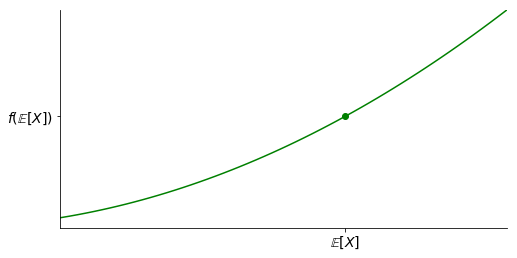

In [2]:
np.random.seed(0)
figsize=(8,4)

mu = .5
scale = .1
def f(x):
    return (x)**2

def der_f(x):
    return 2*x

n = 100
inputs = np.random.normal(size=n,loc=mu,scale=scale)
mu = np.mean(inputs)

b = der_f(mu)
a = f(mu) - b*mu
def g(x):
    return a + b*x

fig, ax = plt.subplots(figsize=figsize)

def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def remove_labels(ax):
    ax.set_yticks([])
    ax.set_xticks([])
    
def add_one_xlabel(ax, which, pos, string):
    if which == 'x':
        ax.set_xticks([pos])
        ax.set_xticklabels([string],fontsize=14)
    else:
        ax.set_yticks([pos])
        ax.set_yticklabels([string],fontsize=14)
        
x = np.linspace(0,1,100)
        
def plot_func(ax,color,func, label=None):
    remove_spines(ax)
    remove_labels(ax)
    add_one_xlabel(ax,'x',mu,'$\mathbb{E}[X]$')
    if label is None:
        add_one_xlabel(ax,'y',func(mu),'$f(\mathbb{E}[X])$')
    else:
        add_one_xlabel(ax,'y',func(mu),label)
    ax.scatter([mu],[func(mu)],color=color)
    y = np.array([func(xi) for xi in x])
    ax.plot(x,y,color=color)
    ax.set_ylim((0,.5))
    ax.set_xlim((.15,np.sqrt(.5)))
    
plot_func(ax,'green',f)

fig.savefig('barebones',dpi=150)

pass

(I'm not telling you which convex function this is because it's not necessary to know.)

From here, we can make progress if we consider another function (call it $g(\cdot)$) for which the relation holds with equality:

$$
\mathbb{E}[g(X)] = g(\mathbb{E}[X])
$$

That is, the average of the outputs is the same as the output of the average input. 

An obvious choice is a linear function: $g(x) = a + bx$ for some chosen $a$ and $b$. Since the equality holds for any $a$ and $b$, let's choose them such that they are tanget to our convex function at the point $(\mathbb{E}[X],f(\mathbb{E}[X]))$.

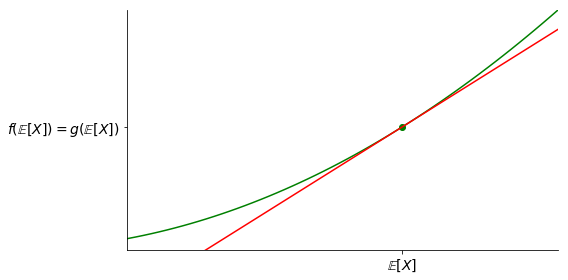

In [7]:
fig, ax = plt.subplots(figsize=figsize)

plot_func(ax,'green',f,label='$f(\mathbb{E}[X])=g(\mathbb{E}[X])$')
ax.plot(x,g(x),color='red')
fig.tight_layout()
fig.savefig('f_and_g',dpi=150)

pass

Now let's ignore the convex function $f(\cdot)$ and focus on our linear function $g(\cdot)$. Specifically, let's see if a visual can help us get a feel for either side of our equation:

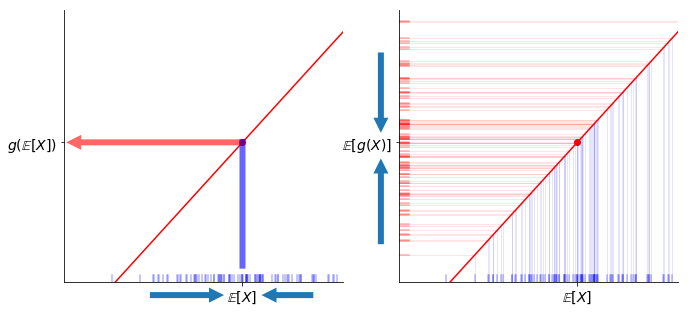

In [4]:

# import matplotlib.patches as mpatches

style="Simple,head_length=1.5,head_width=1.5,tail_width=.6"
# arrow = arrow = mpatches.FancyArrowPatch((.1, .1), (.2, 0.2), arrowstyle=style)

fig, axarr = plt.subplots(1,2,figsize=(11,5))
plot_func(axarr[0],'red',g, '$g(\mathbb{E}[X])$')

def apply_samples(ax,color,samples,kind='inputs'):
    if kind == 'inputs':
        ymax = ax.get_ylim()[1]
        for s in samples:
            ax.axvline(s, ymax=0.05*ymax, alpha=.3, color=color)
    else:
        xmax = ax.get_xlim()[1]
        for s in samples:
            ax.axhline(s, xmax=0.05*xmax, alpha=.3, color=color)
        
def add_corner_lines(ax, x, func, input_col, output_col, alpha=None,linewidth=1):
    
    ymax = ax.get_ylim()[1]
    x_dist = ax.get_xlim()[1] - ax.get_xlim()[0]
    ax.axvline(x, ymax=func(x)/ymax, alpha=alpha, color=input_col,linewidth=linewidth)
    ax.axhline(func(x), xmax=(x-ax.get_xlim()[0])/x_dist, alpha=alpha, color=output_col,linewidth=linewidth)
    
apply_samples(axarr[0],'blue',inputs)

style2="Simple,head_length=0.01,head_width=1.5,tail_width=.6"
axarr[0].annotate('', xy=(.58, -0.05), xycoords='axes fraction', xytext=(0.3, -.05),
            arrowprops=dict(arrowstyle=style,ec='none'))
axarr[0].annotate('', xy=(.7, -0.05), xycoords='axes fraction', xytext=(.9, -.05),
            arrowprops=dict(arrowstyle=style,ec='none'))
axarr[0].annotate('', xy=(mu, f(mu)+0.01), xytext=(mu, .02),
            arrowprops=dict(arrowstyle=style2,ec='none',color='blue',alpha=.6))
axarr[0].annotate('', xy=(ax.get_xlim()[0], f(mu)), xytext=(mu, f(mu)),
            arrowprops=dict(arrowstyle=style,ec='none',color='red',alpha=.6))
# add_corner_lines(axarr[0], mu, g, input_col='blue', output_col='blue' ,alpha=1,linewidth=3)
# axarr[0].annotate('', xy=(mu, f(mu)-0.02), xytext=(mu, .02),
#             arrowprops=dict(arrowstyle=style,ec='none'))
# axarr[0].annotate('', xy=(ax.get_xlim()[0], f(mu)), xytext=(mu, .02),
#             arrowprops=dict(arrowstyle='-|>', alpha=.5,linewidth=5,color='blue',
#                             connectionstyle="angle,angleA=90,angleB=0"))

plot_func(axarr[1],'red',g, '$\mathbb{E}[g(X)]$')
apply_samples(axarr[1],'blue',inputs)
apply_samples(axarr[1],'red',[g(ip) for ip in inputs],kind='outputs')

for ip in inputs:
    add_corner_lines(axarr[1], ip, g, input_col='blue', output_col='red' ,alpha=.1)

axarr[1].annotate('', xy=(-0.065, .54), xycoords='axes fraction', xytext=(-0.065, .85),
            arrowprops=dict(arrowstyle=style,ec='none'))
axarr[1].annotate('', xy=(-0.065, .46), xycoords='axes fraction', xytext=(-0.065, .13),
            arrowprops=dict(arrowstyle=style,ec='none'))

# ax.annotate('', xy=(mu, 0), xytext=(mu, f(mu)-0.02),
#             arrowprops=dict(arrowstyle="<-", color='b',linewidth=3))

# ax.annotate('', xy=(mu-0.02, f(mu)), xytext=(0+ax.get_xlim()[0], f(mu)),
#             arrowprops=dict(arrowstyle="<-", color='b',linewidth=3))

# for ii in inputs:
#     ax.annotate('', xy=(ii, 0), xytext=(ii, g(ii)),
#                 arrowprops=dict(arrowstyle="<-", color='g',linewidth=1.5,alpha=.3))
#     ax.annotate('', xy=(ii, g(ii)), xytext=(0+ax.get_xlim()[0], g(ii)),
#                 arrowprops=dict(arrowstyle="<-", color='g',linewidth=1.5,alpha=.3))

# ax.annotate('', xy=(-.05, 0), xytext=(-.05, f(mu)-0.02),
#             arrowprops=dict(arrowstyle="<-", color='g',linewidth=3))

fig.savefig('Equality',dpi=150)


(The colliding arrows are my attempt at representing averaging)

The left plot shows us how to calculate $g(\mathbb{E}[X])$ while the right tells us how to calculate $\mathbb{E}[g(X)]$. Since $g(\cdot)$ is a linear function, we know these two approaches yield the same final result. Easy, right?

Now, let's imagine taking our right plot and passing points *instead* through our convex function. What's the effect? Just trace the trajectory of a few samples:

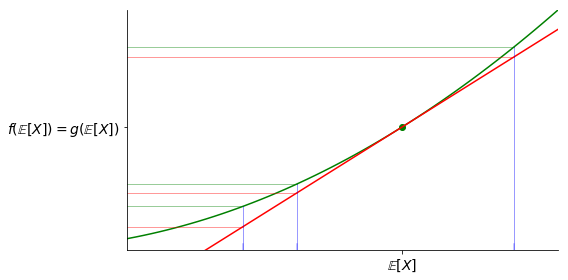

In [8]:
fig, ax = plt.subplots(figsize=figsize)

plot_func(ax,'green',f,label='$f(\mathbb{E}[X])=g(\mathbb{E}[X])$')
ax.plot(x,g(x),color='red')

inputs_few = [.3,.37,.65]

apply_samples(ax,'blue',inputs_few)

ymax = ax.get_ylim()[1]
x_dist = ax.get_xlim()[1] - ax.get_xlim()[0]
for ip in inputs_few:
    ax.axvline(ip, ymax=f(ip)/ymax, alpha=.4, color='blue',linewidth=1)
    ax.axhline(f(ip), xmax=(ip-ax.get_xlim()[0])/x_dist, alpha=.4, color='green',linewidth=1)
    ax.axhline(g(ip), xmax=(ip-ax.get_xlim()[0])/x_dist, alpha=.4, color='red',linewidth=1)

fig.tight_layout()
fig.savefig('Maps_higher',dpi=150)

Obvious right? No matter what point we choose, mapping to the convex function will always yield a higher value than mapping to the linear function. See where this is going?

Now, just for fun, let's pass them all through our convex function:

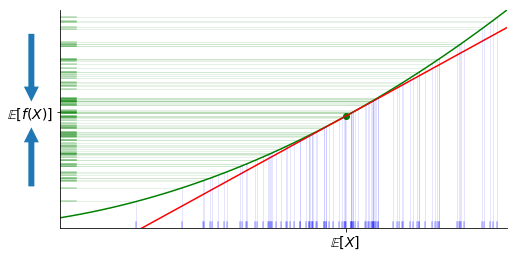

In [6]:
fig, ax = plt.subplots(figsize=figsize)

plot_func(ax,'green',f,label='$f(\mu)=g(\mu)$')
ax.plot(x,g(x),color='red')

apply_samples(ax,'blue',inputs)
apply_samples(ax,'green',[f(ip) for ip in inputs],kind='outputs')

Efx = np.mean([f(ip) for ip in inputs])
add_one_xlabel(ax,'y',Efx,'$\mathbb{E}[f(X)]$')

    
for ip in inputs:
    add_corner_lines(ax, ip, f, input_col='blue', output_col='green' ,alpha=.1)
    
ax.annotate('', xy=(-0.065, .57), xycoords='axes fraction', xytext=(-0.065, .9),
            arrowprops=dict(arrowstyle=style,ec='none'))
ax.annotate('', xy=(-0.065, .47), xycoords='axes fraction', xytext=(-0.065, 0.18),
            arrowprops=dict(arrowstyle=style,ec='none'))

fig.savefig('EfX',dpi=150)

So since all these green outputs ($f(X)$) must map to points above their respective red points ($g(X)$), then we must have $\mathbb{E}[f(X)]>\mathbb{E}[g(X)]$. Since $\mathbb{E}[g(X)]=g(\mathbb{E}[X])=f(\mathbb{E}[X])$, then $\mathbb{E}[f(X)]>f(\mathbb{E}[X])$ and we've proved our result!

### Where my intuition?

The goal here isn't to provide a rigorous proof of the result, but to communicate the feel as to why it's true. In simpliest terms, it's because a convex function 'bends off' a linear function and that bending increases the output for all points, relative to the linear function.

With this level of understanding, a few things are easier to realize:

1. By the same argument, our relation is reversed for a concave function.
2. The size of the difference $\mathbb{E}[f(X)] - f(\mathbb{E}[X])$ increases as the variance of $X$ increase or as the curvature of our convex function increases.
3. There's nothing special about the expectation operator ($\mathbb{E}[\cdot]$) here. Any linear interpolation of points would work.

This right here is the value of an intuitive understanding. In addition to the result, you get everything in the obvious peripheral.